# Bank Churners Prediction (Modeling)

### Logistic regression, KNN, decision tree, random forest, SVM, Gradient boosting, xgboost, cross validation, hyperparameter tuning, grid search cv, pipeline, regularization parameter (C) tuning, PCA

## 1. Importing libraries and dataframes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
X_train = pd.read_csv('..\Dataset\X_train.csv', index_col=0).reset_index(drop=True)
X_test = pd.read_csv('..\Dataset\X_test.csv', index_col=0).reset_index(drop=True)
y_train = pd.read_csv('..\Dataset\y_train.csv', index_col=0).reset_index(drop=True).values.ravel()
y_test = pd.read_csv('..\Dataset\y_test.csv', index_col=0).reset_index(drop=True).values.ravel()

In [3]:
X_train.head()

,Age,Dependent_Count,Months_On_Book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_$40K - $60K,Income_$60K - $80K,Income_$80K - $120K,Income_Less than $40K,Income_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.791543,0.498352,0.002708,-1.841984,0.745299,-0.415160,0.324106,0.617387,0.267968,1.339053,...,0,0,0,0,0,1,0,0,0,1
1,-0.037350,1.269124,0.002708,-0.550727,-1.400375,1.442415,0.274543,0.291116,0.247961,-0.444369,...,0,0,0,0,0,1,0,0,0,1
2,0.716844,-1.813965,0.002708,0.740530,-1.400375,-0.415160,-0.657427,-0.068149,-0.650666,0.711856,...,1,0,0,0,0,1,0,0,0,0
3,-1.420038,-0.272420,-0.753447,1.386159,0.745299,0.513627,1.462074,0.127369,1.449226,0.270090,...,1,0,0,1,0,0,0,0,0,0
4,0.716844,0.498352,0.632838,-1.196355,0.745299,-0.415160,-0.778979,-0.446965,-0.737843,-0.777057,...,1,0,0,0,0,1,0,0,0,0


## 2. Churn prediction using K Nearest Neighbors Classifier

Tuning hyperparameters for KNN classifier

{'p': 1, 'n_neighbors': 7, 'leaf_size': 5}
Best Score: 0.9090257879656161


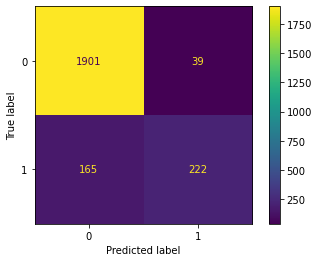

In [4]:
# define models and parameters
param_grid = {'n_neighbors': list(range(1,11)), 'leaf_size': list(range(1,50)), 'p':[1,2]}
knn = KNeighborsClassifier()

# define randomized search cv and train the training dataset
knn_cv = RandomizedSearchCV(knn, param_grid, cv=5)
best_model = knn_cv.fit(X_train, y_train)

# Get the optimum hyperparameter
print(best_model.best_params_)
print('Best Score:', best_model.best_score_)
print(plot_confusion_matrix(best_model, X_test, y_test, values_format = 'd' ))

In [5]:
#Create the optimum KNN Classifier
optimum_knn = KNeighborsClassifier(p = 2, n_neighbors = 9, leaf_size = 24)

#Train the model using the training sets
optimum_knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = optimum_knn.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', optimum_knn)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Training Accuracy: %.3f' % (optimum_knn.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (optimum_knn.score(X_test, y_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))

Model: KNeighborsClassifier(leaf_size=24, n_neighbors=9)
Accuracy Score:  0.9174903308981521
Training Accuracy: 0.926
Test Accuracy: 0.917
Confusion Matrix:
 [[1900   40]
 [ 152  235]]
F1 Score: 0.912


## 3. Churn rediction using Random Forest Classifier

In [6]:
# Tuning hyperparameter for Logistic Regression classifier
Cs = [0.001, 0.1, 1, 10, 100]

param_grid = {'C': Cs, 'penalty' : ['l2']}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5, n_jobs = -1)

#Train the model using the training sets
best_model = logreg_cv.fit(X_train, y_train)

print(best_model.best_params_)
print(best_model.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.8984240687679084


In [16]:
#Create the optimum Logistic Regression Classifier
logreg = LogisticRegression(C = 0.1, penalty = 'l2')

#Train the model using the training sets
logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logreg.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', logreg)
print('Training Accuracy: %.3f' % (logreg.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (logreg.score(X_test, y_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))

Model: GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100], 'penalty': ['l2']})
Training Accuracy: 0.901
Test Accuracy: 0.904
Confusion Matrix:
 [[1875   65]
 [ 159  228]]
F1 Score: 0.898


## 3. Churn prediction using Decision Tree Classifier

In [8]:
#Create a Decision Tree Classifier
model = DecisionTreeClassifier()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', model)
print('Training Accuracy: %.3f' % (model.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (model.score(X_test, y_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))

Model: DecisionTreeClassifier()
Training Accuracy: 1.000
Test Accuracy: 0.935
Confusion Matrix:
 [[1858   82]
 [  70  317]]
F1 Score: 0.935


## 4. Churn prediction using Random Forest Classifier

In [9]:
#Create a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', model)
print('Training Accuracy: %.3f' % (model.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (model.score(X_test, y_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))

Model: RandomForestClassifier(random_state=42)
Training Accuracy: 1.000
Test Accuracy: 0.957
Confusion Matrix:
 [[1919   21]
 [  78  309]]
F1 Score: 0.956


In [10]:
clf = RandomForestClassifier(n_estimators=500, random_state = 42,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Measuring model's performance using different evaluation metrics
print('Model:', model)
print('Training Accuracy: %.3f' % (model.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (model.score(X_test, y_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Model: RandomForestClassifier(random_state=42)
Training Accuracy: 1.000
Test Accuracy: 0.957
Confusion Matrix:
 [[1918   22]
 [  69  318]]
F1 Score: 0.960
Random Forest: Accuracy=0.961
Random Forest: f1-score=0.960


In [11]:
#Create a svm Classifier
clf = SVC() # Linear Kernel kernel='linear'

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Measuring model's performance using different evaluation metrics
print('Model:', clf)
print('Training Accuracy: %.3f' % (model.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (model.score(X_test, y_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))

Model: SVC()
Training Accuracy: 1.000
Test Accuracy: 0.957
Confusion Matrix:
 [[1902   38]
 [ 106  281]]
F1 Score: 0.936


In [12]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.835
Accuracy score (validation): 0.834

Learning rate:  0.1
Accuracy score (training): 0.844
Accuracy score (validation): 0.840

Learning rate:  0.25
Accuracy score (training): 0.886
Accuracy score (validation): 0.875

Learning rate:  0.5
Accuracy score (training): 0.911
Accuracy score (validation): 0.900

Learning rate:  0.75
Accuracy score (training): 0.910
Accuracy score (validation): 0.898

Learning rate:  1
Accuracy score (training): 0.915
Accuracy score (validation): 0.911



In [13]:
gb_final = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gb_final.fit(X_train, y_train)
y_pred = gb_final.predict(X_test)

print('Model:', gb_final)
print('Training Accuracy: %.3f' % (model.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (model.score(X_test, y_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))

Model: GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)
Training Accuracy: 1.000
Test Accuracy: 0.957
Confusion Matrix:
 [[1876   64]
 [ 142  245]]
F1 Score: 0.907


In [14]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123, use_label_encoder=False)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)


# Predict the labels of the test set: preds
y_pred = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
# print('Model:', xg_cl)
print('Training Accuracy: %.3f' % (model.score(X_train, y_train)))
print('Test Accuracy: %.3f' % (model.score(X_test, y_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('F1 Score: %.3f' % (f1_score(y_test, y_pred, average='weighted')))

[02:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 1.000
Test Accuracy: 0.957
Confusion Matrix:
 [[1905   35]
 [  55  332]]
F1 Score: 0.961


In [15]:
# %pip install xgboost